In [1]:
# 분석 (탐색적 데이터 분석(EDA: Exploratory Data Analysis))
# -기온의 평균
# -특정 날짜의 평균 기온
# -월별 평균 기온 구하기
# -기온이 30도 이상이었던 날 구하기

# 예측(회귀 분석): 내일 기온 예측

# 예시: 10년동안의 매월 1월 1일의 평균기온
#      날짜만 주면 그날의 평균기온이 나오도록

#      예측은 2006년 부터 2015년까지 데이터를 프레임데이터 셋으로 
#      2016년 데이터를 테스트 데이터로 하여 분석하여 예측 결과 내기

In [2]:
import pandas as pd

In [3]:
import matplotlib.pyplot as plt

In [4]:
in_file = "./data.csv"
out_file = "./temdata.csv"

# CSV 파일을 한 줄 씩 읽어 들이기 ---(*1)
with open(in_file, "rt", encoding="EUC_KR") as fr:
    lines = fr.readlines()

# 기존의 데이터를 분리해서 가공하기 ---(*2)
lines = ["연,월,일,기온,품질,균질\n"] + lines[5:]
lines = map(lambda v: v.replace("/", ","), lines)
result = "".join(lines).strip()
print(result)

# 결과를 파일에 출력하기 ---(*3)
with open(out_file, "wt", encoding="utf-8") as fw:
    fw.write(result)
    print("saved.")

연,월,일,기온,품질,균질
2006,1,1,3.6,8,1
2006,1,2,4,8,1
2006,1,3,3.7,8,1
2006,1,4,4,8,1
2006,1,5,3.6,8,1
2006,1,6,2.1,8,1
2006,1,7,2.8,8,1
2006,1,8,4.2,8,1
2006,1,9,3.7,8,1
2006,1,10,4.3,8,1
2006,1,11,6.1,8,1
2006,1,12,6.1,8,1
2006,1,13,4,8,1
2006,1,14,6.6,8,1
2006,1,15,10.7,8,1
2006,1,16,9,8,1
2006,1,17,8,8,1
2006,1,18,5.6,8,1
2006,1,19,4.2,8,1
2006,1,20,4,8,1
2006,1,21,1.3,8,1
2006,1,22,3.1,8,1
2006,1,23,2.5,8,1
2006,1,24,4.4,8,1
2006,1,25,5.5,8,1
2006,1,26,6,8,1
2006,1,27,6.8,8,1
2006,1,28,5.5,8,1
2006,1,29,6,8,1
2006,1,30,8.4,8,1
2006,1,31,7.1,8,1
2006,2,1,5.7,8,1
2006,2,2,7.8,8,1
2006,2,3,6,8,1
2006,2,4,1.6,8,1
2006,2,5,1.9,8,1
2006,2,6,2,8,1
2006,2,7,3.6,8,1
2006,2,8,7.9,8,1
2006,2,9,4.6,8,1
2006,2,10,5.6,8,1
2006,2,11,7.5,8,1
2006,2,12,4.6,8,1
2006,2,13,5.7,8,1
2006,2,14,10.5,8,1
2006,2,15,14.1,8,1
2006,2,16,7.5,8,1
2006,2,17,7,8,1
2006,2,18,4.4,8,1
2006,2,19,7,8,1
2006,2,20,6.4,8,1
2006,2,21,8,8,1
2006,2,22,10.8,8,1
2006,2,23,11.2,8,1
2006,2,24,6.5,8,1
2006,2,25,7.8,8,1
2006,2,26,7.5,8,

In [5]:
df=pd.read_csv("./temdata.csv")

In [6]:
print(df)

         연   월   일    기온  품질  균질
0     2006   1   1   3.6   8   1
1     2006   1   2   4.0   8   1
2     2006   1   3   3.7   8   1
3     2006   1   4   4.0   8   1
4     2006   1   5   3.6   8   1
...    ...  ..  ..   ...  ..  ..
4013  2016  12  27  11.1   8   2
4014  2016  12  28   6.0   8   2
4015  2016  12  29   4.3   8   2
4016  2016  12  30   6.0   8   2
4017  2016  12  31   6.3   8   2

[4018 rows x 6 columns]


In [7]:
df['기온'].mean() #전체 기온의 평균

16.6522399203584

In [8]:
mon_temp=(df['월'] >= 1) & (df['월']<=12)
print(mon_temp)

0       True
1       True
2       True
3       True
4       True
        ... 
4013    True
4014    True
4015    True
4016    True
4017    True
Name: 월, Length: 4018, dtype: bool


In [9]:
import numpy as np

In [10]:
# 평균 기온 구하기
# 날짜 별 기온을 dictionary에 저장
md = {}
for i, row in df.iterrows():
    m, d, v = (int(row["월"]), int(row["일"]), float(row["기온"]))
    key = str(m) + "/" + str(d)
    if not(key in md):
        md[key] = []
        md[key] += [v]
# 날짜별 평균
avg = {}
for key in md:
    v = avg[key] = sum(md[key]) / len(md[key])
    print("{0} : {1}".format(key,v))
    
               

1/1 : 3.6
1/2 : 4.0
1/3 : 3.7
1/4 : 4.0
1/5 : 3.6
1/6 : 2.1
1/7 : 2.8
1/8 : 4.2
1/9 : 3.7
1/10 : 4.3
1/11 : 6.1
1/12 : 6.1
1/13 : 4.0
1/14 : 6.6
1/15 : 10.7
1/16 : 9.0
1/17 : 8.0
1/18 : 5.6
1/19 : 4.2
1/20 : 4.0
1/21 : 1.3
1/22 : 3.1
1/23 : 2.5
1/24 : 4.4
1/25 : 5.5
1/26 : 6.0
1/27 : 6.8
1/28 : 5.5
1/29 : 6.0
1/30 : 8.4
1/31 : 7.1
2/1 : 5.7
2/2 : 7.8
2/3 : 6.0
2/4 : 1.6
2/5 : 1.9
2/6 : 2.0
2/7 : 3.6
2/8 : 7.9
2/9 : 4.6
2/10 : 5.6
2/11 : 7.5
2/12 : 4.6
2/13 : 5.7
2/14 : 10.5
2/15 : 14.1
2/16 : 7.5
2/17 : 7.0
2/18 : 4.4
2/19 : 7.0
2/20 : 6.4
2/21 : 8.0
2/22 : 10.8
2/23 : 11.2
2/24 : 6.5
2/25 : 7.8
2/26 : 7.5
2/27 : 8.6
2/28 : 4.6
3/1 : 5.7
3/2 : 8.2
3/3 : 6.4
3/4 : 6.7
3/5 : 8.3
3/6 : 11.8
3/7 : 9.9
3/8 : 12.3
3/9 : 8.9
3/10 : 8.0
3/11 : 11.6
3/12 : 13.8
3/13 : 5.5
3/14 : 5.3
3/15 : 8.4
3/16 : 11.7
3/17 : 13.2
3/18 : 12.3
3/19 : 9.7
3/20 : 8.5
3/21 : 11.7
3/22 : 10.3
3/23 : 10.4
3/24 : 11.2
3/25 : 10.7
3/26 : 13.6
3/27 : 12.3
3/28 : 13.0
3/29 : 9.8
3/30 : 8.0
3/31 : 8.0
4/1 : 10.7
4/2 : 

In [11]:
avg["3/21"]

11.7

In [12]:
# 월별 평균 구하기
g = df.groupby(["월"])["기온"]
gg = g.sum() / g.count()
print(gg)

월
1      5.996481
2      6.598714
3     10.017009
4     14.481515
5     19.607918
6     22.544848
7     26.422287
8     27.887097
9     24.360303
10    19.155132
11    13.484545
12     8.653079
Name: 기온, dtype: float64


C:\Users\BIT\AppData\Local\Temp/ipykernel_4640/1033820455.py:2: UserWarning: Glyph 50900 (\N{HANGUL SYLLABLE WEOL}) missing from current font.
  plt.savefig("mean-month.png")
C:\Users\BIT\anaconda3\envs\data-env\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 50900 (\N{HANGUL SYLLABLE WEOL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


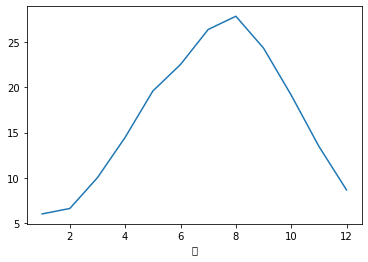

In [13]:
gg.plot()
plt.savefig("mean-month.png")
plt.show()

연
2006     2
2007    11
2008     5
2010    21
2011     9
2012     8
2013    16
2014    12
2015     7
2016     1
Name: 연, dtype: int64


C:\Users\BIT\AppData\Local\Temp/ipykernel_4640/3056114252.py:7: UserWarning: Glyph 50672 (\N{HANGUL SYLLABLE YEON}) missing from current font.
  plt.savefig("temp-over30.png")


<function matplotlib.pyplot.show(close=None, block=None)>

C:\Users\BIT\anaconda3\envs\data-env\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 50672 (\N{HANGUL SYLLABLE YEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


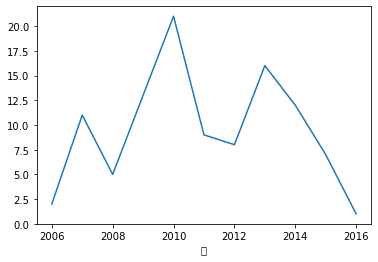

In [14]:
# 기온이 30도를 넘는 데이터
hot_bool = (df["기온"] > 30)
hot = df[hot_bool]
count = hot.groupby(["연"])["연"].count()
print(count)
count.plot()
plt.savefig("temp-over30.png")
plt.show

In [15]:
from sklearn.linear_model import LinearRegression

In [16]:
df = pd.read_csv("./temdata.csv", encoding="utf-8")

In [17]:
train_year = (df["연"] <= 2015)
test_year =(df["연"] >= 2016)
interval = 6

In [18]:
def make_data(data):
    x = []
    y = []
    temps = list(data["기온"])
    for i in range(len(temps)):
        if i < interval:
            continue
        y.append(temps[i])
        xa = []
        for p in range(interval):
            d = i + p - interval
            xa.append(temps[d])
        x.append(xa)
    return (x, y)

In [19]:
train_x, train_y = make_data(df[train_year])
test_x, test_y = make_data(df[test_year])

In [20]:
lr = LinearRegression(normalize = True)
lr.fit(train_x, train_y)
pred = lr.predict(test_x)

C:\Users\BIT\anaconda3\envs\data-env\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(


<function matplotlib.pyplot.show(close=None, block=None)>

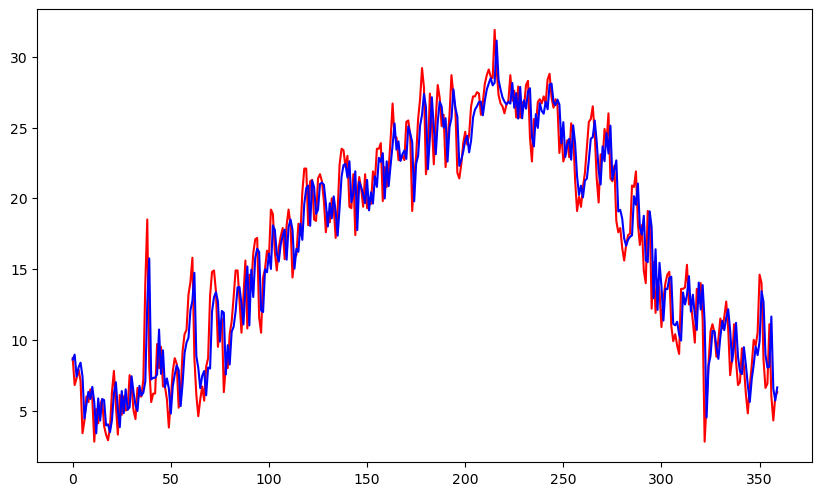

In [21]:
plt.figure(figsize = (10,6), dpi=100)
plt.plot(test_y, c="r")
plt.plot(pred, c="b")
plt.savefig("weather-lr.png")
plt.show